In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Import csv file and put the data in data variable name
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA_SETS/WA_Fn-UseC_-Telco-Customer-Churn.csv', encoding = 'unicode_escape')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:
print(df['TotalCharges'].isna().sum())  # Optional: to see how many nulls


11


In [ ]:
df = df.dropna(subset=['TotalCharges'])


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(df['TotalCharges'].isna().sum())  # Optional: to see how many nulls


0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Text(0.5, 1.0, 'Feature Correlation')

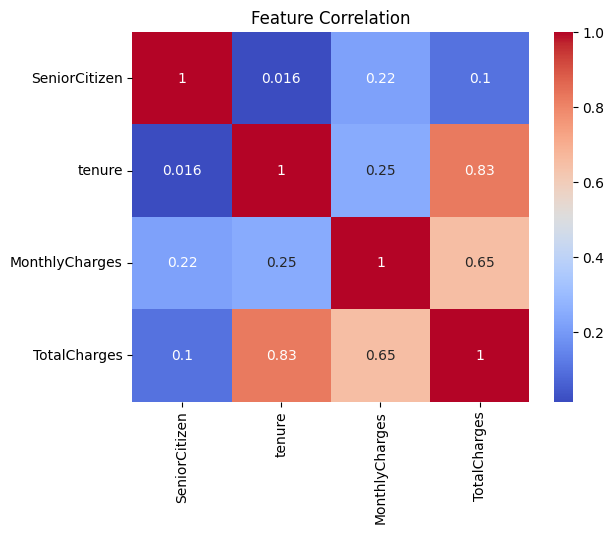

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")


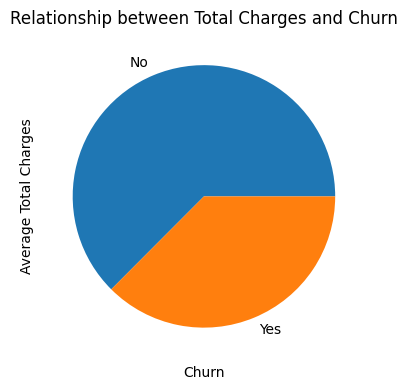

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 4))

# Correct way to calculate group-wise average
avg_charges = df.groupby('Churn')['TotalCharges'].mean()

# Bar plot
avg_charges.plot(kind='pie', color=sns.color_palette('Set2'))

# Labels and title
plt.xlabel('Churn')
plt.ylabel('Average Total Charges')
plt.title('Relationship between Total Charges and Churn')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Relationship b/w MonthlyCharges and Churn')

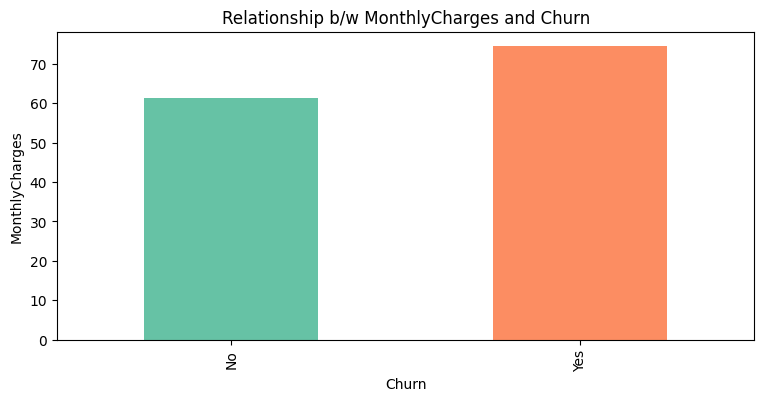

In [ ]:
plt.figure(figsize=(9,4))
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar',color = sns.color_palette('Set2'))
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.title('Relationship b/w MonthlyCharges and Churn')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
# df['Churn'] = LabelEncoder().fit_transform(df['Churn'])


In [ ]:
# x = df[['MonthlyCharges','SeniorCitizen','tenure','TotalCharges']]
# x = df[]
# One-hot encode categorical features
x = df.drop(['Churn', 'customerID'], axis=1)
x = pd.get_dummies(x, drop_first=True)
y=df['Churn']
# y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = pd.get_dummies(x,drop_first=True)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,43,49.05,2076.20,False,False,False,False,True,False,...,False,True,False,True,False,False,True,False,False,False
3410,0,3,53.40,188.70,True,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
5483,0,55,77.75,4458.15,False,True,False,True,False,True,...,False,False,False,False,False,False,True,False,True,False
5524,0,45,54.65,2553.70,True,True,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
6337,0,55,100.90,5448.60,False,True,True,True,False,True,...,False,True,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,3,50.40,137.25,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
5199,0,51,111.50,5703.25,False,False,False,True,False,True,...,False,True,False,True,True,False,True,False,True,False
5235,0,9,81.15,784.45,True,False,False,True,False,True,...,False,False,False,False,False,False,True,False,True,False
5399,0,50,19.75,989.05,False,False,False,True,False,False,...,True,False,True,False,True,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

def score_classification(model, x_train, x_test, y_train, y_test):
    """
    Train classification model and print classification metrics.
    """
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)

    print("🔍 Evaluation Metrics:")
    print(" train")
    print("Accuracy  :", accuracy_score(y_train, y_train_pred))
    print("Precision :", precision_score(y_train, y_train_pred))
    print("Recall    :", recall_score(y_train, y_train_pred))
    print("F1 Score  :", f1_score(y_train, y_train_pred))
    print("Test")
    print("Accuracy  :", accuracy_score(y_test, y_pred))
    print("Precision :", precision_score(y_test, y_pred))
    print("Recall    :", recall_score(y_test, y_pred))
    print("F1 Score  :", f1_score(y_test, y_pred))



    print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))





In [ ]:
score_classification(LogisticRegression(max_iter=1000), x_train, x_test, y_train, y_test)

🔍 Evaluation Metrics:
 train
Accuracy  : 0.8085333333333333
Precision : 0.6640502354788069
Recall    : 0.565886287625418
F1 Score  : 0.6110509209100758
Test
Accuracy  : 0.7874911158493249
Precision : 0.6205787781350482
Recall    : 0.516042780748663
F1 Score  : 0.5635036496350365

📊 Confusion Matrix:
 [[915 118]
 [181 193]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_classification(KNeighborsClassifier(n_neighbors=5), x_train, x_test, y_train, y_test)



🔍 Evaluation Metrics:
 train
Accuracy  : 0.8380444444444445
Precision : 0.718562874251497
Recall    : 0.6421404682274248
F1 Score  : 0.6782055810667609
Test
Accuracy  : 0.7526652452025586
Precision : 0.536723163841808
Recall    : 0.5080213903743316
F1 Score  : 0.521978021978022

📊 Confusion Matrix:
 [[869 164]
 [184 190]]


In [ ]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [ ]:
score_classification(LogisticRegression(max_iter=1000), x_train_poly, x_test_poly, y_train, y_test)


🔍 Evaluation Metrics:
 train
Accuracy  : 0.8151111111111111
Precision : 0.6804123711340206
Recall    : 0.5739130434782609
F1 Score  : 0.6226415094339622
Test
Accuracy  : 0.7867803837953091
Precision : 0.6128048780487805
Recall    : 0.5374331550802139
F1 Score  : 0.5726495726495726

📊 Confusion Matrix:
 [[906 127]
 [173 201]]


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_poly,y_train)

LogisticRegression(max_iter=1000)